In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 5000
display_step = 500

In [5]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [6]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [8]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0500 cost= 0.093668178 W= 0.321946 b= 0.280965
Epoch: 1000 cost= 0.081856534 W= 0.288782 b= 0.519546
Epoch: 1500 cost= 0.078403667 W= 0.270819 b= 0.64877
Epoch: 2000 cost= 0.077397406 W= 0.26109 b= 0.718761
Epoch: 2500 cost= 0.077105790 W= 0.25582 b= 0.756676
Epoch: 3000 cost= 0.077022173 W= 0.252965 b= 0.777216
Epoch: 3500 cost= 0.076998718 W= 0.251419 b= 0.788334
Epoch: 4000 cost= 0.076992430 W= 0.250584 b= 0.794343
Epoch: 4500 cost= 0.076990902 W= 0.250131 b= 0.797603
Epoch: 5000 cost= 0.076990612 W= 0.249886 b= 0.79936
Optimization Finished!
Training cost= 0.0769906 W= 0.249886 b= 0.79936 



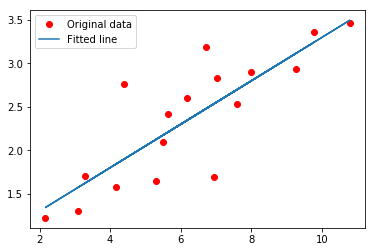

In [10]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [11]:
# Regression result